# Wizart Vision Demo 1

The Computer Vision service provides developers with access to advanced algorithms for processing images and returning information. Computer Vision algorithms analyze the content of an image in different ways, depending on the visual features you're interested in.

You can use Computer Vision in your application to:
- Indoor semantic segmentation.
- Interior 3d reconstruction.
- Indoor layout and object detection.
- Analytics data such as image quality, interior type, camera parameters.

Looking for more documentation?

* [SDK reference documentation](https://vision-api.wizart.ai/)
* [Wizart Vision review](https://wizart.ai/vision-api)

If you need access to Wizart Vision API, you can get [API token](https://wizart.ai/trial?source=vision_api) by sending a request.

In [ ]:
!pip install wizart-vision

In [1]:
import cv2
import numpy as np
import pprint
from IPython import display
from PIL import Image
from wizart.vision import ComputerVisionClient as vc

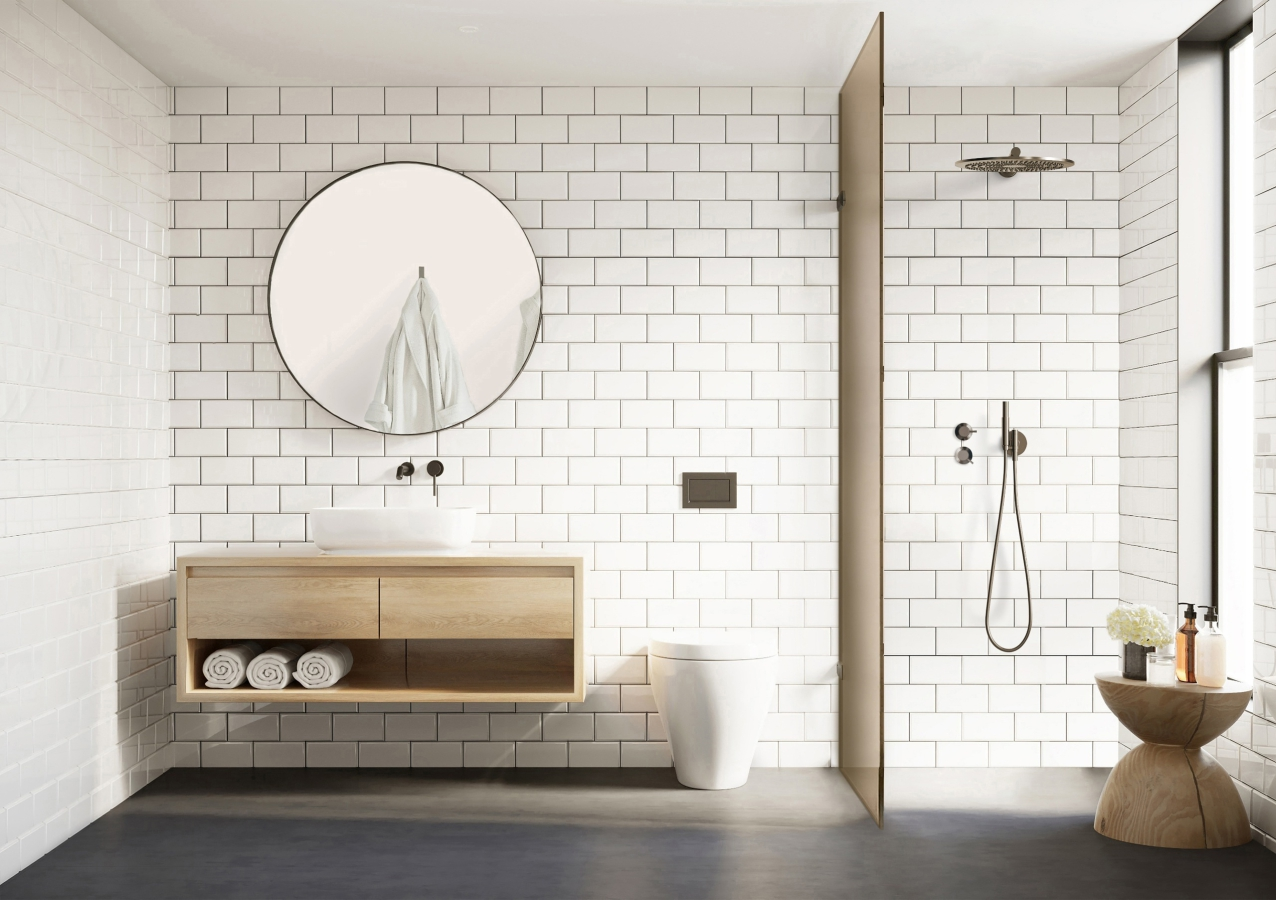

In [2]:
client = vc(
    token="You token"
)
image_url = 'https://images.wizart.ai/images/interiors/reserved/images/5f3e6837-b514-4f6d-a16b-e7d364868699.jpg'

display.Image(image_url)

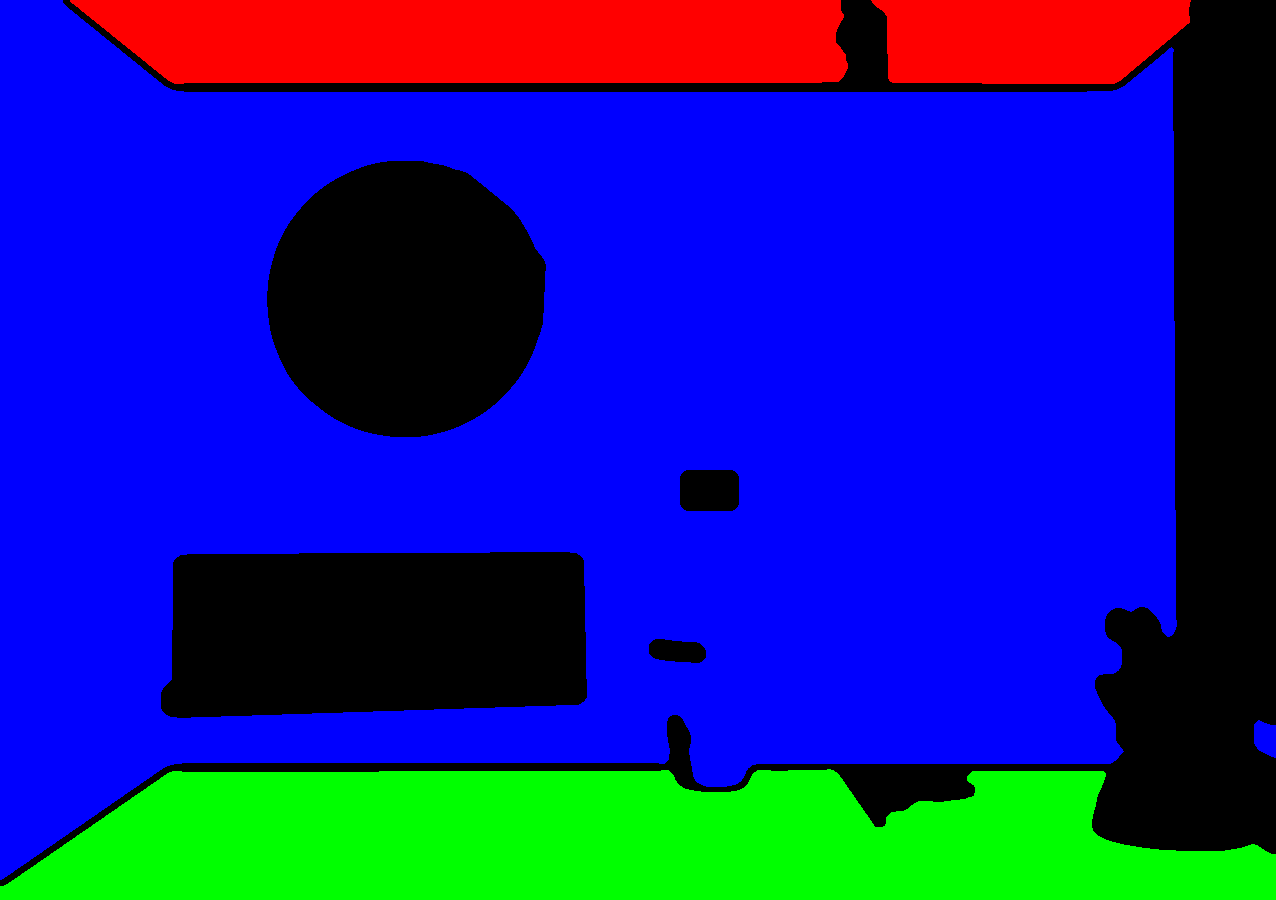

In [3]:
mask = client.segmentation(
    resource=image_url
)

display.display(Image.fromarray(mask))

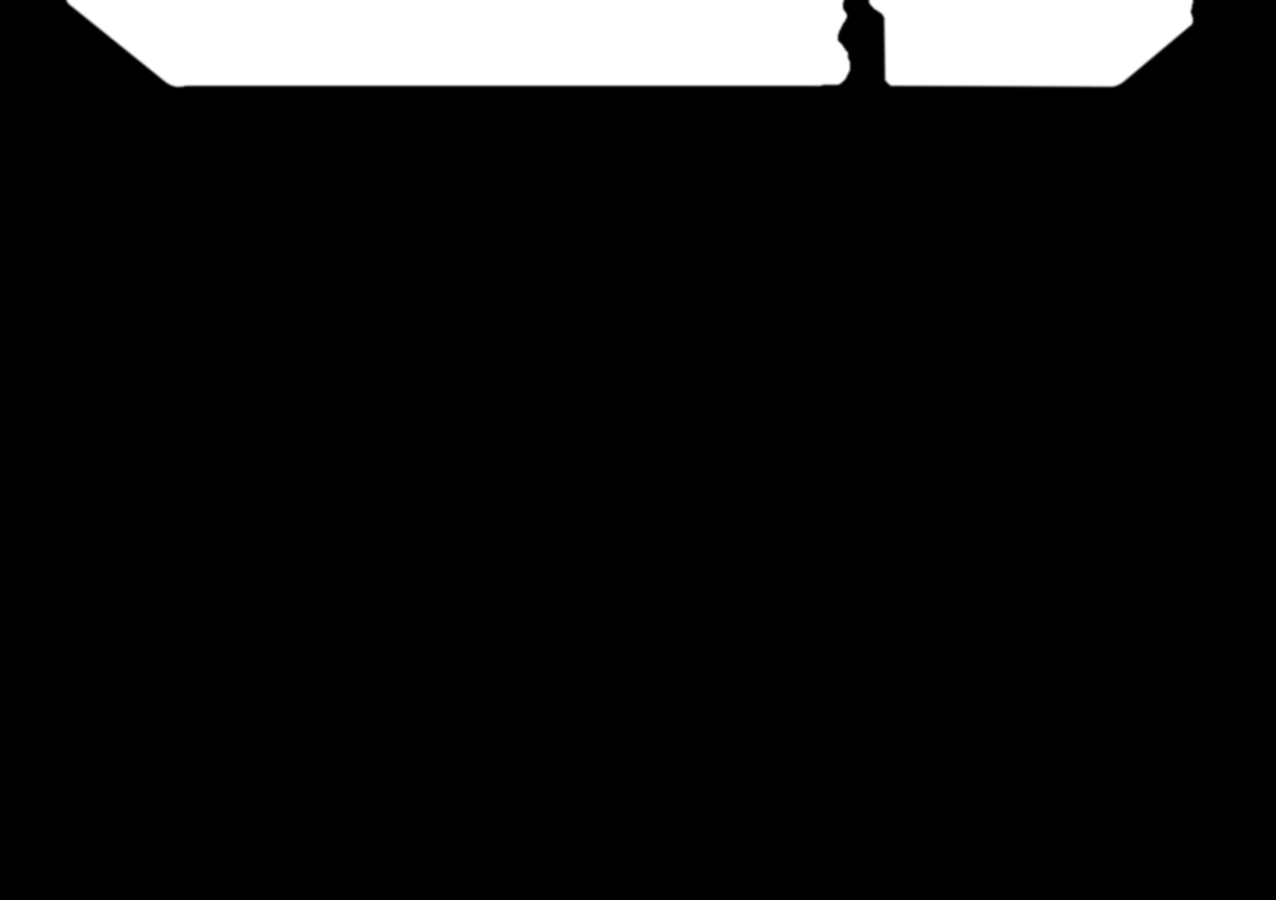

In [4]:
mask = client.segmentation(
    resource=image_url,
    feature=vc.feature.CEILING
)
display.display(Image.fromarray(mask))

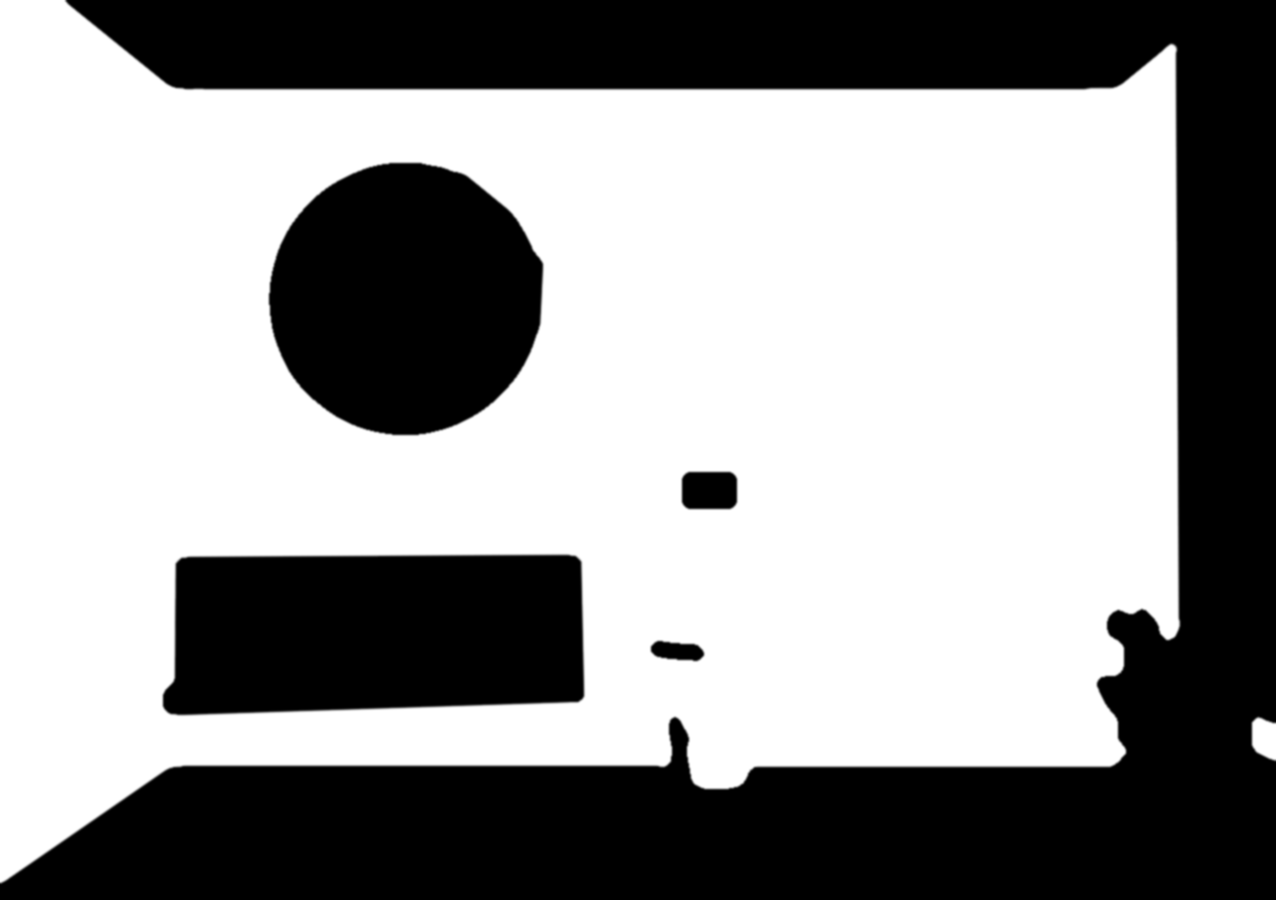

In [5]:
mask = client.segmentation(
    resource=image_url,
    feature=vc.feature.WALL
)
display.display(Image.fromarray(mask))

In [6]:
vectorized = client.segmentation(
    resource=image_url,
    feature=vc.feature.CEILING,
    vectorized=True
)
pprint.pprint(vectorized)

{'contours': [[[[867, 0]],
               [[867, 4]],
               [[868, 5]],
               [[868, 6]],
               [[873, 11]],
               [[874, 11]],
               [[876, 13]],
               [[877, 13]],
               [[881, 17]],
               [[881, 18]],
               [[882, 19]],
               [[882, 80]],
               [[883, 81]],
               [[883, 82]],
               [[888, 87]],
               [[911, 87]],
               [[912, 88]],
               [[1115, 88]],
               [[1116, 87]],
               [[1118, 87]],
               [[1119, 86]],
               [[1120, 86]],
               [[1121, 85]],
               [[1122, 85]],
               [[1123, 84]],
               [[1124, 84]],
               [[1128, 80]],
               [[1129, 80]],
               [[1135, 74]],
               [[1136, 74]],
               [[1141, 69]],
               [[1142, 69]],
               [[1147, 64]],
               [[1148, 64]],
               [[1153, 59]],
      

In [7]:
detection_all = client.detection(
    resource=image_url
)
pprint.pprint(detection_all)

{'ceiling': {'points': [{'x': 0.12852664291858673, 'y': 0.09000000357627869},
                        {'x': 0.8706896305084229, 'y': 0.09555555880069733},
                        {'x': 0.9902669615238398, 'y': 0},
                        {'x': 0.050251016822307495, 'y': 0},
                        {'x': 0.12852664291858673, 'y': 0.09000000357627869}]},
 'floor': {'points': [{'x': 1, 'y': 1},
                      {'x': 1, 'y': 0.9163761274378737},
                      {'x': 0.8794223666191101, 'y': 0.849625289440155},
                      {'x': 0.12146215885877609, 'y': 0.8567042946815491},
                      {'x': 0, 'y': 0.9544444680213928},
                      {'x': 0, 'y': 1},
                      {'x': 1, 'y': 1}]},
 'walls': [{'cx': 6.0015191105092205,
            'cy': 47.069064670138886,
            'points': [{'x': 0, 'y': 0.9544444680213928},
                       {'x': 0.12146215885877609, 'y': 0.8567042946815491},
                       {'x': 0.12852664291858673, '

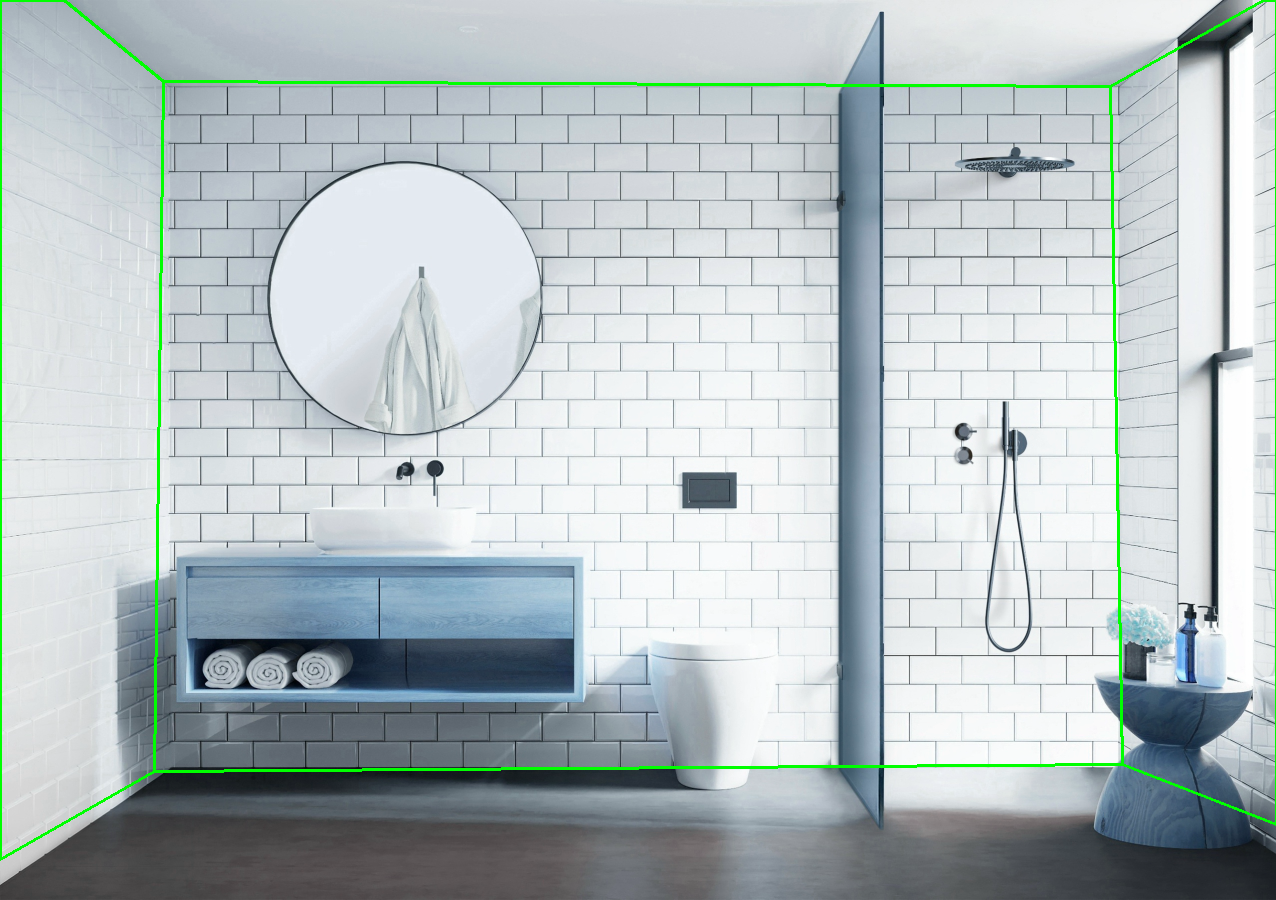

{'walls': [{'cx': 6.0015191105092205,
            'cy': 47.069064670138886,
            'points': [{'x': 0, 'y': 0.9544444680213928},
                       {'x': 0.12146215885877609, 'y': 0.8567042946815491},
                       {'x': 0.12852664291858673, 'y': 0.09000000357627869},
                       {'x': 0.050251016822307495, 'y': 0},
                       {'x': 0, 'y': 0},
                       {'x': 0, 'y': 0.9544444680213928}],
            'wall_id': 0},
           {'cx': 49.96286230774882,
            'cy': 47.60357666015625,
            'points': [{'x': 0.12146215885877609, 'y': 0.8567042946815491},
                       {'x': 0.8794223666191101, 'y': 0.849625289440155},
                       {'x': 0.8706896305084229, 'y': 0.09555555880069733},
                       {'x': 0.12852664291858673, 'y': 0.09000000357627869},
                       {'x': 0.12146215885877609, 'y': 0.8567042946815491}],
            'wall_id': 1},
           {'cx': 89.97118719692888,
        

In [8]:
from urllib.request import urlopen

def prepare_detection_wall_image(image, data):
    for wall in data['walls']:
        prev_point = None
        points = wall['points']

        for point in points:
            coord_x, coord_y = int(point['x'] * image.shape[1]), int(point['y'] * image.shape[0])


            if prev_point is not None:
                image = cv2.line(image, (coord_x, coord_y), prev_point, (0, 255, 0), 2)

            prev_point = (coord_x, coord_y)

    return image

req = urlopen(image_url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)

feature_detection = client.detection(
    resource=image_url,
    feature=vc.feature.WALL
)

res_image = prepare_detection_wall_image(img.copy(), feature_detection)
display.display(Image.fromarray(res_image))
pprint.pprint(feature_detection)

In [9]:
reconstruction_all = client.reconstruction(
    resource=image_url
)
pprint.pprint(reconstruction_all)

{'ceiling': {'area': 5.195667842177329,
             'points': [{'x': -2.540337562561035,
                         'y': 2.169140577316284,
                         'z': -5.621172904968262},
                        {'x': 2.5842678546905518,
                         'y': 2.169140577316284,
                         'z': -5.715136528015137},
                        {'x': 2.811492681503296,
                         'y': 2.169140577316284,
                         'z': -4.689094066619873},
                        {'x': -2.5615134239196777,
                         'y': 2.169140577316284,
                         'z': -4.6696882247924805},
                        {'x': -2.540337562561035,
                         'y': 2.169140577316284,
                         'z': -5.621172904968262}]},
 'floor': {'area': 9.21878662111709,
           'points': [{'x': 2.2965145111083984,
                       'y': -1.5,
                       'z': -3.8703665733337402},
                      {'x': 2.80359482

In [10]:
feature = client.reconstruction(
    resource=image_url,
    feature=vc.feature.CEILING
)
pprint.pprint(reconstruction_all)

{'ceiling': {'area': 5.195667842177329,
             'points': [{'x': -2.540337562561035,
                         'y': 2.169140577316284,
                         'z': -5.621172904968262},
                        {'x': 2.5842678546905518,
                         'y': 2.169140577316284,
                         'z': -5.715136528015137},
                        {'x': 2.811492681503296,
                         'y': 2.169140577316284,
                         'z': -4.689094066619873},
                        {'x': -2.5615134239196777,
                         'y': 2.169140577316284,
                         'z': -4.6696882247924805},
                        {'x': -2.540337562561035,
                         'y': 2.169140577316284,
                         'z': -5.621172904968262}]},
 'floor': {'area': 9.21878662111709,
           'points': [{'x': 2.2965145111083984,
                       'y': -1.5,
                       'z': -3.8703665733337402},
                      {'x': 2.80359482

In [11]:
data = client.analysis(
    resource=image_url
)
pprint.pprint(data)

{'camera': {'fov': 46.00706678143672,
            'height': 1.5,
            'pitch': 0.03261528399283131,
            'roll': -0.001674420561634693},
 'image_info': {'bad_target_confidence': 8.789119654295519e-09,
                'blurry_confidence': 5.761411739513278e-05,
                'dark_confidence': 8.961017738329247e-05,
                'noisy_confidence': 1.9508647710608784e-06},
 'interior_type': "children's room"}


In [12]:
data = client.analysis(
    resource=image_url,
    feature=vc.analysis_types.CAMERA
)
pprint.pprint(data)

{'fov': 46.00706678143672,
 'height': 1.5,
 'pitch': 0.03261528399283131,
 'roll': -0.001674420561634693}


In [13]:
data = client.analysis(
    resource=image_url,
    feature=vc.analysis_types.IMAGE_INFO
)
pprint.pprint(data)

{'bad_target_confidence': 8.789119654295519e-09,
 'blurry_confidence': 5.761411739513278e-05,
 'dark_confidence': 8.961017738329247e-05,
 'noisy_confidence': 1.9508647710608784e-06}


In [14]:
data = client.interior(
    resource=image_url
)
pprint.pprint(data)

{'analysis': {'camera': {'fov': 46.00706678143672,
                         'height': 1.5,
                         'pitch': 0.03261528399283131,
                         'roll': -0.001674420561634693},
              'image_info': {'bad_target_confidence': 8.789119654295519e-09,
                             'blurry_confidence': 5.761411739513278e-05,
                             'dark_confidence': 8.961017738329247e-05,
                             'noisy_confidence': 1.9508647710608784e-06},
              'interior_type': "children's room"},
 'detection': {'ceiling': {'points': [{'x': 0.12852664291858673,
                                       'y': 0.09000000357627869},
                                      {'x': 0.8706896305084229,
                                       'y': 0.09555555880069733},
                                      {'x': 0.9902669615238398, 'y': 0},
                                      {'x': 0.050251016822307495, 'y': 0},
                                      {'x'

In [15]:
data = client.interior(
    resource=image_url,
    feature=vc.feature.CEILING
)
pprint.pprint(data)

{'analysis': {'camera': {'fov': 46.00706678143672,
                         'height': 1.5,
                         'pitch': 0.03261528399283131,
                         'roll': -0.001674420561634693},
              'image_info': {'bad_target_confidence': 8.789119654295519e-09,
                             'blurry_confidence': 5.761411739513278e-05,
                             'dark_confidence': 8.961017738329247e-05,
                             'noisy_confidence': 1.9508647710608784e-06},
              'interior_type': "children's room"},
 'detection': {'points': [{'x': 0.12852664291858673, 'y': 0.09000000357627869},
                          {'x': 0.8706896305084229, 'y': 0.09555555880069733},
                          {'x': 0.9902669615238398, 'y': 0},
                          {'x': 0.050251016822307495, 'y': 0},
                          {'x': 0.12852664291858673,
                           'y': 0.09000000357627869}]},
 'reconstruction': {'area': 5.195667842177329,
            